In [1]:
! gdown 14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T

Downloading...
From: https://drive.google.com/uc?id=14DoImQQ3OHZKgqmKwtBO8qysiZ3lTc1T
To: /content/20-04-2022-TO-20-04-2023-M&M-EQ-N.csv
100% 26.0k/26.0k [00:00<00:00, 75.5MB/s]


In [2]:
import pandas as pd
import math 
import datetime 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
     

In [3]:
df=pd.read_csv('20-04-2022-TO-20-04-2023-M&M-EQ-N.csv')

In [4]:
type(df['Symbol  '][1])

str

In [5]:
df.isnull().values.any()


False

In [6]:
df.index

RangeIndex(start=0, stop=242, step=1)

In [7]:
dt_li=[]
for i in df.index:
  dt_li.append(datetime.datetime.strptime(df['Date  '][i],'%d-%m-%Y').date())
  
df.index=dt_li

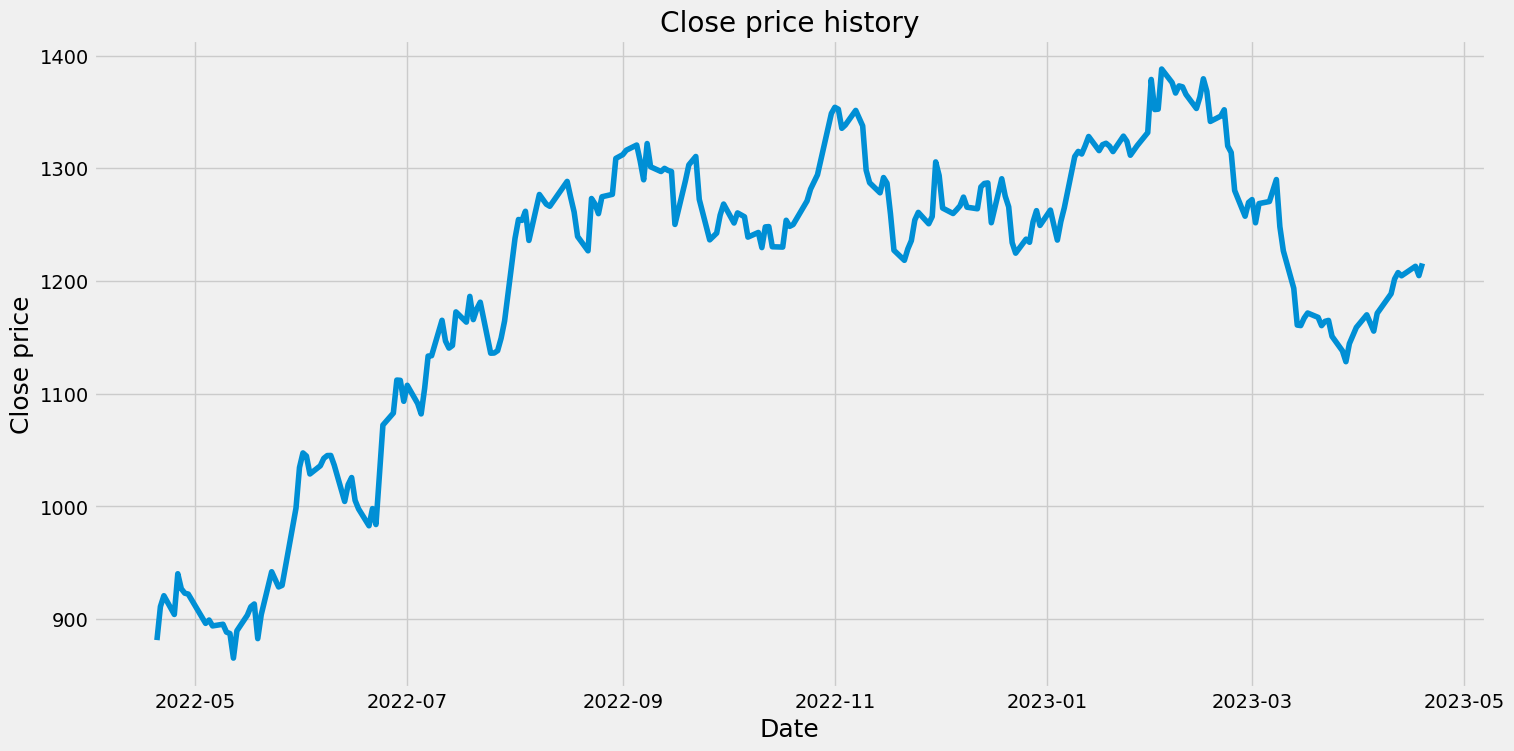

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df.index,df['Close Price  '])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.show()

In [9]:
#Create a dataframe with the close column only 
data=df['Close Price  ']
#convert the data into numpy array 
dataset=data.values
dataset.shape

(242,)

In [10]:
print(data)

2022-04-20     881.25
2022-04-21     911.00
2022-04-22     920.65
2022-04-25     904.00
2022-04-26     940.15
               ...   
2023-04-12    1207.35
2023-04-13    1204.55
2023-04-17    1212.95
2023-04-18    1204.70
2023-04-19    1215.50
Name: Close Price  , Length: 242, dtype: float64


In [11]:
dataset=dataset.reshape(-1,1)
dataset.shape

(242, 1)

In [12]:
dataset[1][0]

911.0

In [13]:
#Scaling the data 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
# print(scaled_data)

#scaled_data is same as the 'dataset', the only differencebeing that the values are between 0 and 1

In [14]:
#Get the number of rows to train the model on  
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len
#training set is 80% of the values


194

In [15]:
#Create training dataset
train_data=scaled_data[0:training_data_len,:]
len(train_data)

194

In [16]:
#Splitting into x train and y train
#x train will have the sets data values i.e. the past 60 days data divided into sets of (0,59), (1,60), (2,61) etc.
#y train will have the target values, for each set the target value is the closing price of the next day, i.e. for x_train (0,59) the target will be the closing price of 60th day. 
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0]) 


In [17]:
x_train


[array([0.03060736, 0.08751793, 0.105978  , 0.07412721, 0.14328073,
        0.11783835, 0.11028216, 0.10875179, 0.05901483, 0.06465806,
        0.05471066, 0.05748446, 0.04418938, 0.04170253, 0.        ,
        0.04638929, 0.07288379, 0.08713534, 0.09191774, 0.03309421,
        0.07374462, 0.14662841, 0.12080344, 0.12348159, 0.25461502,
        0.32348159, 0.34835007, 0.34299378, 0.31257771, 0.32654232,
        0.33916786, 0.34385462, 0.34404591, 0.32759445, 0.26599713,
        0.29459589, 0.30655189, 0.26781444, 0.25327594, 0.22467719,
        0.25384983, 0.22678144, 0.3107604 , 0.39560019, 0.41597322,
        0.47202296, 0.47154472, 0.43596365, 0.46312769, 0.43223338,
        0.4145385 , 0.4577714 , 0.51276901, 0.5133429 , 0.5735055 ,
        0.53830703, 0.52625538, 0.53065519, 0.58775705, 0.57034912]),
 array([0.08751793, 0.105978  , 0.07412721, 0.14328073, 0.11783835,
        0.11028216, 0.10875179, 0.05901483, 0.06465806, 0.05471066,
        0.05748446, 0.04418938, 0.04170253, 0.

In [18]:
y_train

[0.6140602582496415,
 0.5746532759445242,
 0.5928263988522242,
 0.6042085126733618,
 0.5176470588235293,
 0.5179340028694406,
 0.5219512195121951,
 0.5430894308943093,
 0.5723577235772357,
 0.7125777140124341,
 0.7446197991391679,
 0.743089430894309,
 0.7585844093735052,
 0.7090387374461984,
 0.7870875179340029,
 0.7705404112864658,
 0.7670014347202296,
 0.809277857484457,
 0.7824007651841223,
 0.7573409851745581,
 0.7157340985174558,
 0.6914395026303204,
 0.7802008608321378,
 0.7710186513629842,
 0.7544715447154475,
 0.7831659493065519,
 0.7872788139646101,
 0.8483022477283599,
 0.8547106647537062,
 0.8621712099473937,
 0.8709708273553325,
 0.8439024390243905,
 0.8119560019129604,
 0.8735533237685322,
 0.8340506934481109,
 0.8260162601626018,
 0.8313725490196076,
 0.8279292204686755,
 0.8260162601626018,
 0.7362027737924435,
 0.8099473935915831,
 0.8373027259684362,
 0.844380679100909,
 0.8515542802486848,
 0.7786704925872789,
 0.7099952175992352,
 0.7214729794356769,
 0.7519846963175

In [19]:
type(x_train)

list

In [20]:
#currently x_train and y_train are simply lists, so we convert them to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [21]:
print(x_train.shape,"\n",y_train.shape)

(134, 60) 
 (134,)


In [22]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#this statement is equivalent to np.reshape(x_train,(134,60,1))
#LSTMs expect a 3D input


In [23]:
#Building the model
model1=Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1))) #  If return_sequences is set to True, the LSTM layer will return the full sequence of outputs for each input. This is useful when you need access to the intermediate outputs at each time step, such as when stacking multiple LSTM layers or when connecting to subsequent layers that expect a sequence as input.
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [24]:
#Compiling the model
model1.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
#Train the model
model1.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
134/134 [==============================] - 8s 29ms/step - loss: 0.0200
Epoch 2/100
134/134 [==============================] - 4s 27ms/step - loss: 0.0073
Epoch 3/100
134/134 [==============================] - 4s 32ms/step - loss: 0.0068
Epoch 4/100
134/134 [==============================] - 4s 32ms/step - loss: 0.0058
Epoch 5/100
134/134 [==============================] - 4s 28ms/step - loss: 0.0053
Epoch 6/100
134/134 [==============================] - 4s 28ms/step - loss: 0.0053
Epoch 7/100
134/134 [==============================] - 5s 36ms/step - loss: 0.0046
Epoch 8/100
134/134 [==============================] - 4s 30ms/step - loss: 0.0056
Epoch 9/100
134/134 [==============================] - 4s 31ms/step - loss: 0.0048
Epoch 10/100
134/134 [==============================] - 5s 36ms/step - loss: 0.0046
Epoch 11/100
134/134 [==============================] - 4s 28ms/step - loss: 0.0051
Epoch 12/100
134/134 [==============================] - 4s 27ms/step - loss: 0.0038
E

In [26]:
#Testing dataset
test_data=scaled_data[training_data_len-60:,:]
#Create test data sets 
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [27]:
#Convert test data set to numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [28]:
#Predictions
predictions=model1.predict(x_test) 
predictions=scaler.inverse_transform(predictions) #Descaling the value



2/2 [==============================] - 1s 16ms/step


In [29]:
#Get the RMSE 
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.516489156087246

In [30]:
model1.save('M&M.h5')

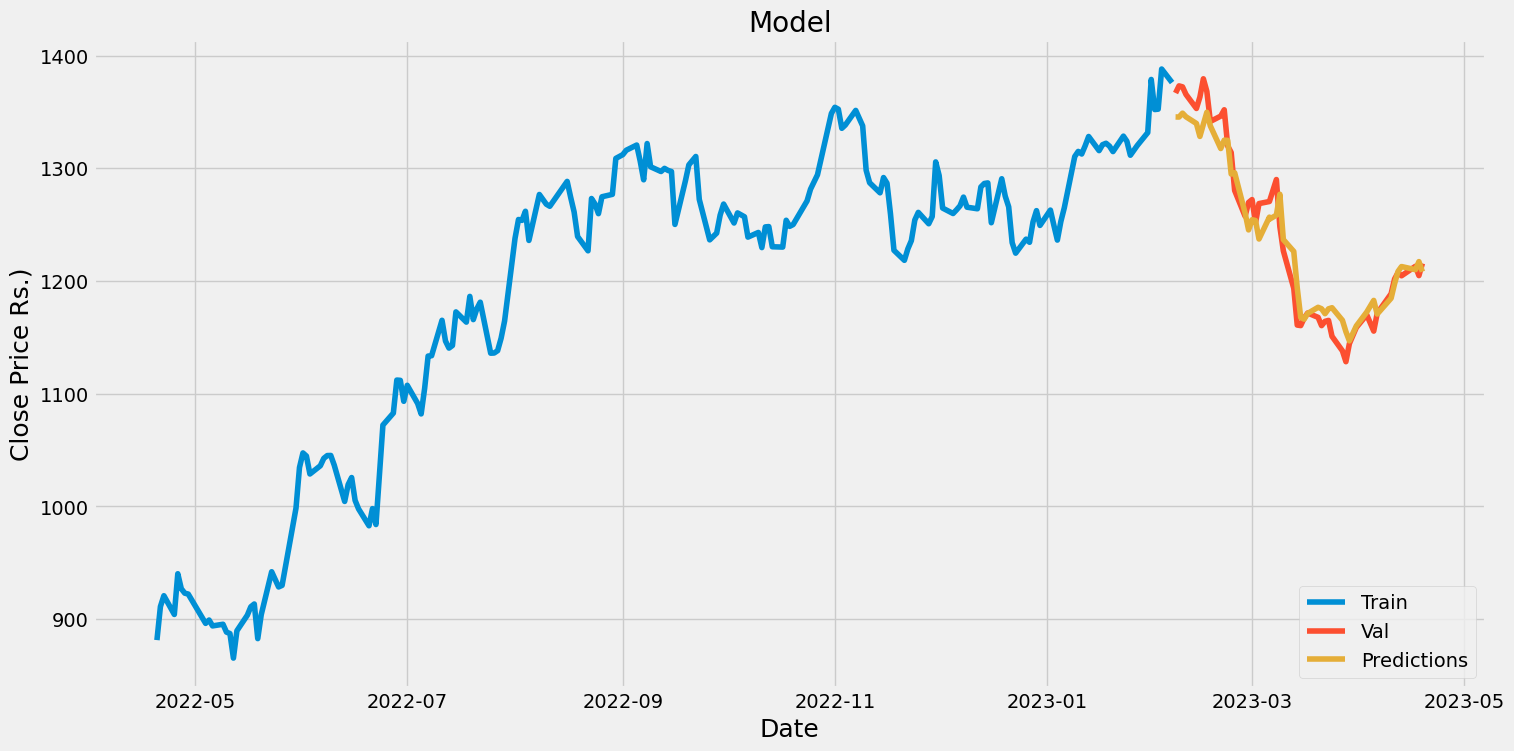

In [31]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid=valid.to_frame(name='Close Price')
valid['Predictions']=predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs.)', fontsize=18)
# plt.plot(train['Close Price '])
plt.plot(train) 
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
valid

,Close Price,Predictions
2023-02-07,1366.70,1345.477905
2023-02-08,1373.05,1345.410645
2023-02-09,1372.20,1348.842896
2023-02-10,1365.45,1345.613037
2023-02-13,1353.00,1339.698120
2023-02-14,1363.15,1328.205200
2023-02-15,1379.35,1339.036133
2023-02-16,1368.15,1349.662231
2023-02-17,1341.50,1337.584839
2023-02-20,1346.25,1317.449097
